In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_csv('heart_disease.csv')

In [98]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


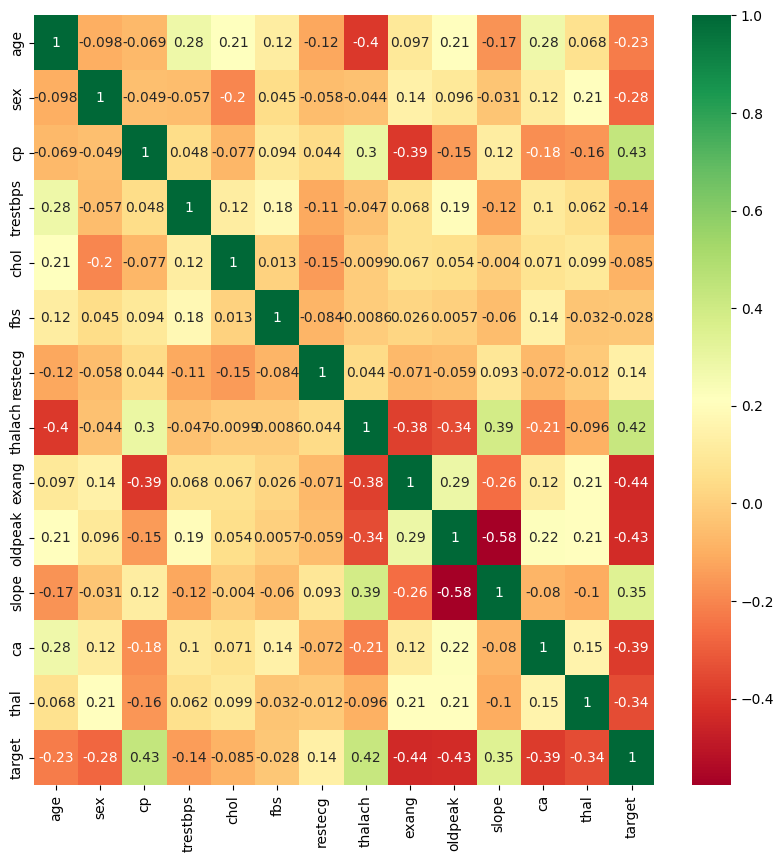

In [99]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,10))
g = sns.heatmap(df[top_corr_features].corr(), annot= True, cmap= "RdYlGn")

In [100]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [101]:
df = pd.get_dummies(df , columns = ['sex','cp', 'fbs', 'restecg' , 'slope', 'ca', 'thal'])

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_col = ['age', 'trestbps','chol' , 'thalach' , 'oldpeak']
df[ss_col] = ss.fit_transform(df[ss_col])

In [103]:
y = df['target']
col_drop = ['target'  , 'exang' , 'oldpeak' ]
x = df.drop(columns= col_drop , axis= 1)

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_score = []
for k in range(1,12):
    knn_classifier = KNeighborsClassifier(n_neighbors= k)
    score = cross_val_score(knn_classifier , x , y , cv = 10)
    knn_score.append(score.mean())

Text(0.5, 1.0, 'K Score')

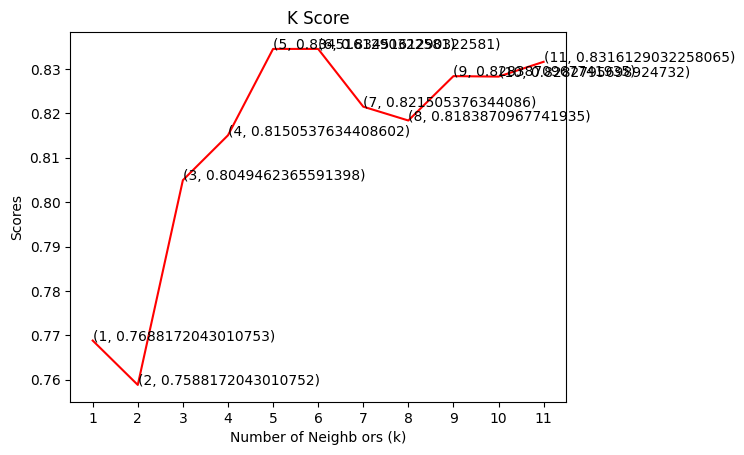

In [89]:
plt.plot([k for k in range(1,12)], knn_score, color ='red')
for i in range(1,12):
    plt.text(i, knn_score[i-1], (i,knn_score[i - 1]))
plt.xticks([i for i in range(1 , 12)])
plt.xlabel('Number of Neighb ors (k)')
plt.ylabel('Scores')
plt.title('K Score')

In [105]:
knn_classifier = KNeighborsClassifier(n_neighbors= 5)
score = cross_val_score(knn_classifier , x , y , cv = 10)
print(score.mean())

0.8345161290322581


In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [109]:
est = DecisionTreeClassifier()
rf_p_list = {'max_depth' : [3 , 5 , 10 , None],
             'max_features' : randint(1,3),
             'criterion' : ['gini' , 'entropy'],
             'min_samples_leaf' : randint(1,4),
             }

In [110]:
def hypertuning_rscv(est , p_distr , nbr_iter, x , y):
    rdmsearch = RandomizedSearchCV(est , param_distributions= p_distr,
                                   n_iter= nbr_iter , cv = 10)
    rdmsearch.fit(x , y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params , ht_score

In [111]:
rf_parameter , rf_ht_score = hypertuning_rscv(est , rf_p_list , 40 , x , y)

In [112]:
print(rf_parameter)
print(rf_ht_score)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 2}
0.7823655913978496


In [91]:
dtree = DecisionTreeClassifier()
score = cross_val_score(dtree , x , y , cv = 10)

In [92]:
score.mean()

0.7386021505376344